In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [11]:
file_path = "Hyderabad.csv"
df = pd.read_csv(file_path)
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
num_rows, num_columns = df.shape
print(f'Dataset has {num_rows} rows and {num_columns} columns')

Dataset has 2518 rows and 40 columns


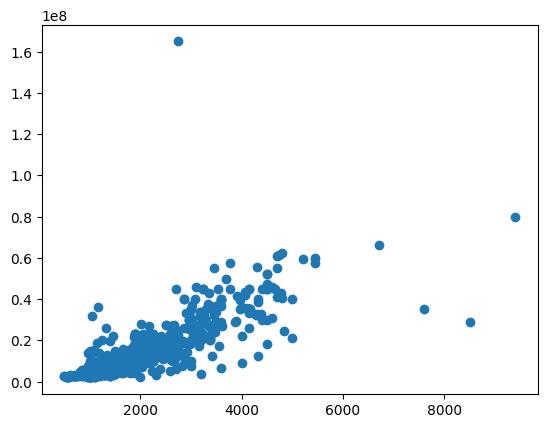

In [9]:
plt.scatter(df['Area'], df['Price'])

In [13]:
X = df[['Area']]
y = df['Price']

simple_model = LinearRegression()
simple_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print(f'y-intercept {simple_model.intercept_}')
print(f'slope (coeff of Area) {simple_model.coef_[0]}')

y-intercept -6222669.083283702
slope (coeff of Area) 9753.94060818404


/Users/andrejsuhanov/Applications/ml_dev/linear_regression/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


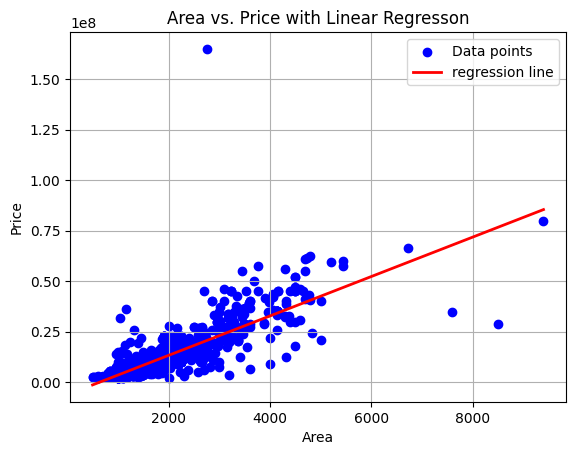

In [15]:
# predic prices of Area
area_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_prices = simple_model.predict(area_range)

plt.scatter(X, y, color='blue', label='Data points')

plt.plot(area_range, predicted_prices, color='red', linewidth=2, label='regression line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price with Linear Regresson')
plt.legend()

plt.grid(True)
plt.show()

### Model uses all the features

In [16]:
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [17]:
# В данных ошибки, где-то есть 9 вместо 0-1 (пропуск данных)
data_truncated = df[:2434]
data_truncated

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,4500000,1250,Kollur Road,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2430,3503000,1001,Miyapur,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,5600000,1551,chandrayangutta,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,7500000,3000,Jubilee Hills,3,1,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [19]:
# масштабирование и центрирование данных
data_scaled = data_truncated.copy()

# среднее и стандартное отклонение
area_mean = data_scaled['Area'].mean()
area_std = data_scaled['Area'].std()

# центрирование -> масштабирование 'Area'
data_scaled['Area'] = (data_scaled['Area'] - area_mean) / area_std


bedrooms_mean = data_scaled['No. of Bedrooms'].mean()
bedrooms_std = data_scaled['No. of Bedrooms'].std()

data_scaled['No. of Bedrooms'] = (data_scaled['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

data_scaled.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,-0.406547,Nizampet,-0.913997,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,2.477960,Hitech City,2.005515,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,-0.435953,Manikonda,-0.913997,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,-0.466696,Alwal,0.545759,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,-0.667195,Kukatpally,-0.913997,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# превращаем строковые признаки в числа

data_scaled_encoded = pd.get_dummies(data_scaled, columns=['Location'], prefix='Location', dtype=int)
data_scaled_encoded.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_Zamistanpur,Location_chandrayangutta,Location_financial District,Location_hyderabad,Location_manneguda,Location_muthangi,Location_new nallakunta,Location_nizampet road,Location_raidurgam,Location_west venkatapuram
0,6968000,-0.406547,-0.913997,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,29000000,2.477960,2.005515,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,6590000,-0.435953,-0.913997,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,-0.466696,0.545759,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5679000,-0.667195,-0.913997,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fit model

In [21]:
X_full = data_scaled_encoded.drop('Price', axis=1)
y_full = data_scaled_encoded['Price']

model_predict_with_all_features = LinearRegression()

model_predict_with_all_features.fit(X_full, y_full)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Print the coefficients of the model

print("\nLinear Regression Model Coefficients (Predicting Price from all features):")
print(f"Intercept: {model_predict_with_all_features.intercept_}")
print("Coefficients for features:")
for feature, coef in zip(X_full.columns, model_predict_with_all_features.coef_):
    print(f"{feature}: {coef}")


Linear Regression Model Coefficients (Predicting Price from all features):
Intercept: 8947283.554193465
Coefficients for features:
Area: 7023504.920884543
No. of Bedrooms: -946893.3983315169
Resale: 1243472.4988406987
MaintenanceStaff: -1009480.508840451
Gymnasium: -566573.4677680125
SwimmingPool: -74999.96382641513
LandscapedGardens: 888197.4101209333
JoggingTrack: -617116.7707485207
RainWaterHarvesting: -499674.7637430053
IndoorGames: 381986.0170280066
ShoppingMall: 653904.5052250547
Intercom: -129946.57641909667
SportsFacility: -14343.905357512354
ATM: -267074.49472985294
ClubHouse: 379591.6860343213
School: -2597664.6435182234
24X7Security: -144163.5423384959
PowerBackup: 164439.46341785166
CarParking: -227003.39319311758
StaffQuarter: 514965.40712330956
Cafeteria: 1170792.4549189403
MultipurposeRoom: 338851.7200329257
Hospital: 1864174.83907193
WashingMachine: 708354.332059081
Gasconnection: 770551.9359812564
AC: 560593.548148293
Wifi: 807040.4215051131
Children'splayarea: 816730

In [23]:
y_pred = model_predict_with_all_features.predict(X_full)

mse = mean_squared_error(y_full, y_pred)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error (RMSE) of the model: {rmse}")



Root Mean Squared Error (RMSE) of the model: 3981396.2916407348


In [24]:
X_full.loc[0]

Area                         -0.406547
No. of Bedrooms              -0.913997
Resale                        0.000000
MaintenanceStaff              0.000000
Gymnasium                     1.000000
                                ...   
Location_muthangi             0.000000
Location_new nallakunta       0.000000
Location_nizampet road        0.000000
Location_raidurgam            0.000000
Location_west venkatapuram    0.000000
Name: 0, Length: 277, dtype: float64

In [26]:
# prompt: use the model_predict_all to predict the price of a house with size 1000 and 3 bedrooms

import pandas as pd
# To predict for a new house, we need to create a DataFrame with the same columns as X_full
# and apply the same scaling and encoding steps.

# New house data
new_house_data = pd.DataFrame({'Area': [1000], 'No. of Bedrooms': [3]})

# We need to apply the same scaling used for the training data
new_house_data['Area'] = (new_house_data['Area'] - area_mean) / area_std
new_house_data['No. of Bedrooms'] = (new_house_data['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

# For location, we assume a default location or one that was present in the training data.
# If we don't specify a location that was in the training data, the one-hot encoding
# will not create a column for that location, which will cause an error when predicting.
# Let's assume the new house is in 'Gachibowli', which was likely in the training data.
# If the location is unknown or not in the training data, we would need to handle this,
# e.g., by adding a column of zeros for that location or using a different approach.

# Create a dummy DataFrame with all possible location columns initialized to 0
# based on the columns of X_full that start with 'Location_'
location_cols = [col for col in X_full.columns if col.startswith('Location_')]
new_house_location_dummies = pd.DataFrame(0, index=new_house_data.index, columns=location_cols)

# Assuming the new house is in 'Gachibowli', set the corresponding column to 1
# Check if 'Location_Gachibowli' exists in the trained model's features
if 'Location_Gachibowli' in location_cols:
    new_house_location_dummies['Location_Gachibowli'] = 1
else:
    print("Warning: 'Location_Gachibowli' was not found in the training data locations.")
    # Handle cases where the location is not in the training data if necessary
    # For this example, we'll proceed without setting a specific location if it's not found.

# Combine the scaled features with the location dummy variables
# Ensure all columns from X_full are present, adding missing ones with value 0
new_house_processed = pd.concat([new_house_data, new_house_location_dummies], axis=1)

# Ensure the order and presence of columns match X_full exactly
# This is crucial for the prediction to work correctly
for col in X_full.columns:
    if col not in new_house_processed.columns:
        new_house_processed[col] = 0 # Add missing columns with value 0

# Reorder columns to match X_full
new_house_processed = new_house_processed[X_full.columns]


# Predict the price using the trained model
predicted_price = model_predict_with_all_features.predict(new_house_processed)

print(f"\nPredicted price for a house with size 1000 and 3 bedrooms: {predicted_price[0]:,.2f}")


Predicted price for a house with size 1000 and 3 bedrooms: 6,004,735.31
